In [26]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

In [27]:
import os

In [28]:
os.getcwd()

'D:\\ISHAN\\SY_AI-A_Sem4\\EDI\\Semac'

In [29]:
os.chdir('D:\\ISHAN\\SY_AI-A_Sem4\\EDI\\Semac')

In [30]:
os.getcwd()

'D:\\ISHAN\\SY_AI-A_Sem4\\EDI\\Semac'

In [31]:
# Functions with use

# Core Python

## append() --  Adds its argument as a single element to the end of a list. The length of the list increases by one.

# Pandas

# Numpy

In [32]:
#importing dataset
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


In [33]:
#dataset info(MetaData)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
 8   target                       1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [34]:
# Dimensionality Analysis
df.shape

(1000, 9)

In [35]:
# Descriptive Statistics
summary = df.describe()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [36]:
#Renaming the column names by creating a dictionary

dict = {'parental level of education': 'parent.ed',
        'test preparation course': 'Course_Project Status',
        'math score': 'GD_Score',
        'reading score': 'GPPT_Score',
        'writing score': 'MSE_Score', 
       'race/ethnicity': 'race'}

df.rename(columns=dict,inplace=True)
df

,gender,race,parent.ed,lunch,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target
0,female,group B,bachelor's degree,standard,none,72,72,74,1
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,0
996,male,group C,high school,free/reduced,none,62,55,55,0
997,female,group C,high school,free/reduced,completed,59,71,65,0
998,female,group D,some college,standard,completed,68,78,77,0


In [37]:
#Removal of unnecessary columns 
df.drop(['parent.ed', 'lunch'], axis=1, inplace=True)
df.head()

,gender,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target
0,female,group B,none,72,72,74,1
1,female,group C,completed,69,90,88,1
2,female,group B,none,90,95,93,1
3,male,group A,none,47,57,44,1
4,male,group C,none,76,78,75,1


In [38]:
# Checking if there is any missing/null values
df.isnull().sum()

gender                   0
race                     0
Course_Project Status    0
GD_Score                 0
GPPT_Score               0
MSE_Score                0
target                   0
dtype: int64

In [39]:
#Calculating the average score(avg_score = (GD_Score + GPPT_Score + MSE_Score)/3)
avg_score=df.mean(axis='columns')
avg_score

## Solve the error here Ishan

0      54.75
1      62.00
2      69.75
3      37.25
4      57.50
       ...  
995    70.50
996    43.00
997    48.75
998    55.75
999    62.25
Length: 1000, dtype: float64

In [40]:
#Adding a new column named Average_score and adding the avg_score values to the column
df['Average_score'] = avg_score
df.head()

,gender,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target,Average_score
0,female,group B,none,72,72,74,1,54.75
1,female,group C,completed,69,90,88,1,62.00
2,female,group B,none,90,95,93,1,69.75
3,male,group A,none,47,57,44,1,37.25
4,male,group C,none,76,78,75,1,57.50


In [41]:
#Counting the number of male and female
classify = df.groupby('gender').count()
classify

,race,Course_Project Status,GD_Score,GPPT_Score,MSE_Score,target,Average_score
gender,,,,,,,
female,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482


<AxesSubplot:xlabel='gender'>

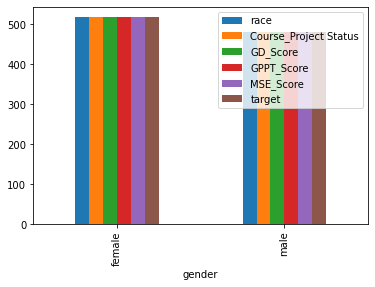

In [16]:
classify.plot.bar()

In [17]:
# hvplots

## Gender Count Plot

df.gender.value_counts().hvplot.bar(
    title="Number of people with gender", xlabel='Gender', ylabel='Count', 
    width=700, height=350
)

:Bars   [index]   (gender)

In [18]:
## Race/Ethnicity Count

df.race.value_counts().hvplot.bar(
    title="Number of people with gender", xlabel='Gender', ylabel='Count', 
    width=700, height=350
)

:Bars   [index]   (race)

In [19]:
# Grouping columns for visualization

table = df.groupby(['race', 'gender']).mean()
table.head()

GD_Score  GPPT_Score  MSE_Score    target
race    gender                                            
group A female  58.527778   69.000000  67.861111  0.388889
        male    63.735849   61.735849  59.150943  0.547170
group B female  61.403846   71.076923  70.048077  0.519231
        male    65.930233   62.848837  60.220930  0.534884
group C female  62.033333   71.944444  71.777778  0.505556

In [44]:
# Plot (Edit y axis for count and not GD_Score)

table.hvplot.bar(stacked=False, height=500, rot=60)

:Bars   [race,gender]   (GD_Score)

In [112]:
#Dataset Splitting

from sklearn.model_selection import train_test_split

x=df.iloc[:, -1].values
y=df.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=42)

In [113]:
print(x_train)

[38.   56.25 44.5  47.5  48.75 37.5  56.   75.   51.   58.25 36.   65.75
 51.5  55.   44.5  56.   45.75 62.5  51.   70.75 56.75 44.   64.5  36.5
 40.75 37.25 48.5  42.   35.   43.25 42.25 58.75 61.25 53.75 22.75 72.75
 65.   56.75 40.5  59.5  61.   52.5  68.5  49.   42.25 62.75 47.75 44.5
 30.75 62.   60.25 57.   49.5  43.25 58.25 51.25 68.   41.   68.75 52.5
 72.75 52.   59.   44.25 34.   43.25 51.25 55.5  62.25 41.25 49.75 56.25
 58.25 38.   30.5  51.   55.   54.   62.5  60.25 48.5  46.   63.   37.5
 54.75 62.75 29.   50.75 61.   45.25 55.25 44.   61.75 67.25 54.25 67.25
 34.5  73.25 53.   53.5  44.25 62.5  26.   40.25 57.5  32.75 60.25 28.75
 46.25 60.   56.25 68.5  40.5  58.75 66.25 51.5  54.75 50.5  47.75 66.25
 53.25 49.75 55.   50.25 69.   56.25 47.5  43.75 35.   61.75 39.5  23.75
 52.25 62.5  49.75 46.   59.   58.   60.5  47.75 49.5  50.   61.75 49.75
 45.75 63.5  51.25 50.5  52.5  48.75 56.5  51.25 68.75 38.5  65.   42.
 43.   22.5  53.75 42.   61.75 51.5  62.75 54.5  51.75 66

In [114]:
print(y_train)

[ 47  82  65  62  63  53  78 100  66  83  46  87  72  75  66  74  60  86
  60 100  85  63  84  49  59  60  69  57  45  59  63  84  80  70  28  96
  90  73  50  73  82  70  87  58  58  88  63  59  43  89  82  81  68  58
  79  75  93  51  87  71 100  67  79  59  46  58  72  78  92  62  68  75
  84  57  44  70  76  74  85  81  64  60  90  51  72  82  34  67  84  61
  68  59  86  95  74  93  48 100  72  68  64  85  34  64  73  37  78  39
  61  73  85  97  55  85  92  70  78  62  64  85  75  72  72  67  95  79
  64  57  42  84  52  39  74  82  68  65  79  74  81  65  67  73  82  76
  64  85  73  73  68  71  71  67  92  54  81  63  56  38  69  59  89  70
  90  73  70  84  55  60  78  81  42  94  52  48  59  66  64  39  76  53
  82  62  71  89  86  81  50  64  70  68  80  62 100  70  83  73  88  54
  60  84  76  90  54  53  64  84  76  72  43  66  49  58  77  54  67  86
 100  73  60  54  84  79  74  86  70  45  53  75  72  76  59  86  52  67
  88  65  58  55  76  78  82  54  58  67  83  70  8

In [115]:
print(x_test)

[65.25 48.   56.25 56.   61.5  58.5  50.5  44.25 58.   36.75 35.25 19.75
 57.   43.75 62.75 56.25 37.   36.25 40.   46.25 55.   37.25 47.25 33.
 59.75 58.25 54.25 37.5  30.75 41.75 45.25 50.5  45.25 55.   58.25 38.5
 57.   55.75 56.25  7.   58.75 48.5  49.25 46.   63.25 49.5  53.25 22.
 65.   59.   54.   53.5  59.25 40.5  54.   54.5  62.25 41.25 61.5  66.75
 32.75 60.75 59.25 46.5  65.75 55.25 48.75 41.   48.75 66.5  48.5  65.
 42.25 37.5  45.25 57.75 67.25 42.75 44.75 37.   46.   30.   58.75 51.75
 51.   48.25 55.75 51.   63.   17.75 58.   72.5  46.   53.5  22.25 52.
 45.5  49.   55.25 48.5  55.75 44.   44.25 51.5  52.25 48.75 34.5  56.75
 57.5  39.25 29.25 60.   40.5  42.   62.   43.25 36.75 36.   52.5  59.
 47.5  48.   61.5  55.25 49.75 50.25 57.   54.75 36.   52.   57.   56.
 35.75 70.5  51.5  29.5  65.25 60.75 55.   35.25 40.25 49.25 43.25 35.
 59.25 40.5  29.5  54.75 38.   60.25 58.25 58.75 46.25 46.5  66.25 54.5
 39.75 50.25 56.5  39.   51.75 49.5  57.25 40.   63.   52.   34.25 

In [116]:
print(y_test)

[ 86  66  73  77  83  75  70  61  73  54  47  26  80  65  81  78  52  46
  58  65  72  51  73  53  79  75  74  59  48  58  61  61  63  71  77  53
  78  77  78  17  75  66  61  63  87  63  70  29  88  82  75  76  79  56
  73  74  78  54  85  90  41  84  77  61  89  74  71  53  63  95  63  88
  57  57  60  76  86  56  66  52  61  37  78  72  71  67  78  70  90  23
  81  92  58  77  38  68  63  70  80  68  78  57  57  73  74  65  45  81
  83  61  41  87  51  59  83  56  52  41  69  77  67  67  81  79  60  66
  75  74  42  73  82  75  42  99  74  41  92  83  74  51  56  70  59  48
  74  61  31  74  52  86  79  86  65  63  91  70  57  72  74  51  79  62
  79  56  82  74  46  90  64  76  84  71  89  86  47  34  52  81  94  82
  64  76  95  61  85  55  72  58  66  84  50  54  67  79  51  57  56  81
  77  74  70  83  89  67  64  24 100  77  64  58  64  62  64  69  67  37
  63  60  84  87  67  58  82  84  29  95  63  65  84  60  73  63  59  55
  42  65  43  76  64  78  57  41  97  55  87  64  6

In [117]:
len(x_train)


750

In [118]:
len(x_test)

250

In [119]:
len(y_train)

750

In [120]:
len(y_test)

250

In [140]:
x_train.ndim

1

In [141]:
y_train.ndim

1

In [142]:
x_train.shape

(750,)

In [143]:
y_train.shape

(750,)

In [144]:
x_train=x_train.reshape(-1,1)

In [145]:
x_train.shape

(750, 1)

In [151]:
x_test=x_test.reshape(-1,1)

In [152]:
x_test.ndim

2

In [153]:
# KNN Classification on datasets

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)



D:\ISHAN\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [155]:
y_pred=classifier.predict(x_test)

In [157]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))



              precision    recall  f1-score   support

          17       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.33      1.00      0.50         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          29       0.00      0.00      0.00         2
          31       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         1
          39       1.00      1.00      1.00         1
          41       0.00      0.00      0.00         5
          42       0.00      0.00      0.00         3
          43       0.11      1.00      0.20         1
          44       0.00      0.00      0.00         0
          45       0.00      0.00      0.00         1
          46       0.00      0.00      0.00         2
          47       0.00    

D:\ISHAN\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ISHAN\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ISHAN\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ISHAN\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: Undefin

In [159]:
#Implementing Random Forest Model

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(random_state=42)


In [162]:
#Fitting the RF Model on training data

rfModel = rf.fit(x_train, y_train)

<ipython-input-162-688bae33ae7d>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfModel = rf.fit(x_train, y_train)


In [168]:
#Prediction using the test data

y_pred = rfModel.predict(x_test) 

print(y_pred)

[87.73604804 65.4926562  78.4433934  76.7354402  81.65410714 75.8430119
 67.34082143 58.9293631  80.00332792 49.11758333 51.88976587 33.37
 77.84364286 57.97928571 85.11120618 78.4433934  49.93359524 51.30811905
 54.9912381  66.63445996 74.99862947 53.06533333 68.94569048 42.0580671
 84.14691789 80.2494572  75.07700289 53.34395887 43.05       59.68728175
 59.88768287 67.34082143 59.88768287 74.99862947 80.2494572  52.87979978
 77.84364286 75.42509205 78.4433934  27.45       81.42170382 66.02434837
 64.53289286 59.96322222 88.895      67.56957398 72.72581169 36.15
 88.62962266 79.32688095 73.56460384 72.82337455 80.58215873 54.98915115
 73.56460384 73.80774928 87.45774964 59.15252381 81.65410714 87.86925
 42.0580671  84.30447222 80.58215873 62.58828571 87.49396429 72.79981602
 67.42793651 54.07295851 67.42793651 90.62445238 66.02434837 88.62962266
 60.00104942 53.34395887 59.88768287 77.11773737 93.82033333 59.83077381
 60.3464881  49.93359524 59.96322222 44.23333333 81.42170382 69.3911

In [164]:
#Importing Regression metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error


In [165]:
#Calculating the performance of the RF Model

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)



In [166]:
print(mae)

3.2227370349791262


In [167]:
print(mse)

16.629218391069443
